 program klasifikasi untuk memprediksi apakah penghasilan seseorang lebih dari $50K atau tidak, berdasarkan data sensus penduduk dari Adult Income Dataset.
---



In [14]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [5]:
# Loading the dataset from local path
column_names = ["age", "workclass", "fnlwgt", "education", "education_num", 
                "marital_status", "occupation", "relationship", "race", 
                "sex", "capital_gain", "capital_loss", "hours_per_week", 
                "native_country", "income"]

data = pd.read_csv(r"C:\Users\USER1\Downloads\tgs random forest\Adult Income Dataset\adult.csv", 
                   names=column_names, skiprows=1)

In [6]:
# Handling missing values
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)


In [7]:

# Encoding categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [8]:

# Splitting the dataset
X = data.drop("income", axis=1)
y = data["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:

# Training with Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Prediction
y_pred = model.predict(X_test)


Accuracy: 0.8565724815724816
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4912
           1       0.75      0.63      0.68      1600

    accuracy                           0.86      6512
   macro avg       0.82      0.78      0.80      6512
weighted avg       0.85      0.86      0.85      6512



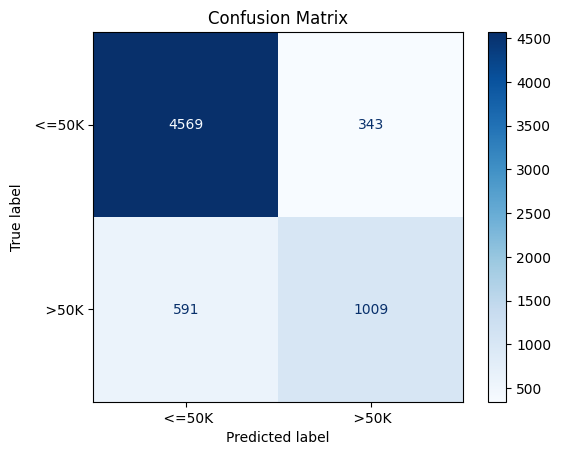

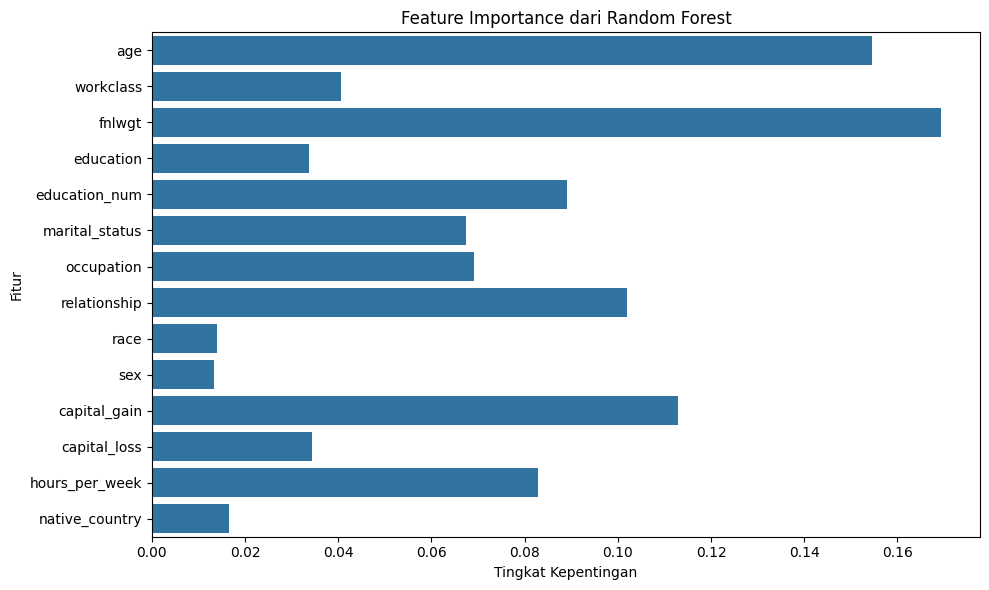

In [13]:

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['income'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Feature Importance Visualization
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance dari Random Forest")
plt.xlabel("Tingkat Kepentingan")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()